# Linear Regression - by Gradient Descent and by Linear Projection

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Loading Dataset - House Size vs Price Relationship

In [2]:
data = pd.read_table("ex1data2.txt",header = None,delimiter = ',')
data.columns = ['Size(sq ft)','# bedrooms','price']
data.head()

,Size(sq ft),# bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Plotting the relationship

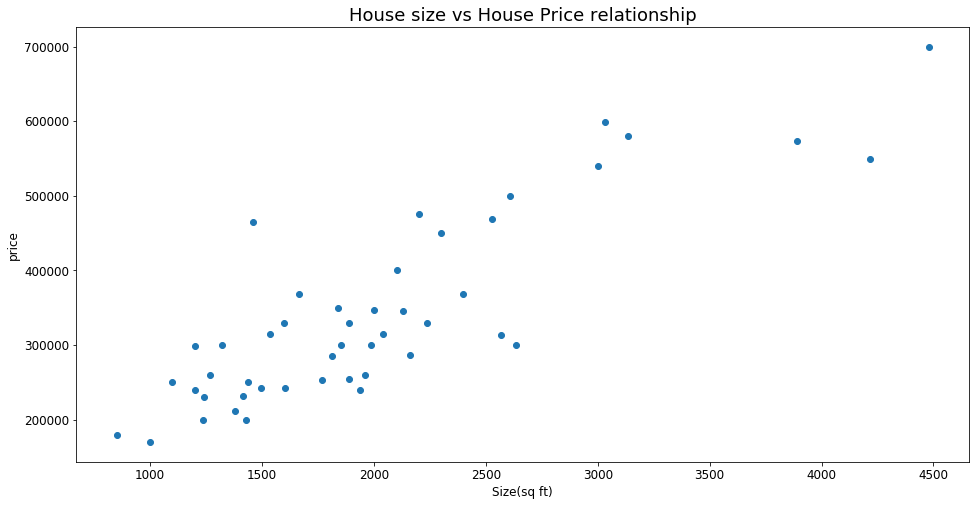

In [3]:
fig = plt.figure(figsize = (16,8))

ax1 = fig.add_subplot(111)
ax1.scatter(data.iloc[:,0],data.iloc[:,2])
ax1.set_xlabel(data.columns[0],fontsize = 12)
ax1.set_ylabel(data.columns[2],fontsize = 12)
ax1.tick_params(labelsize=12)
ax1.set_title("House size vs House Price relationship",fontsize=18)


plt.show()

### Parameterizing Regression
Input variable, House size: X <br>
Target variabl, House Price: y

In [4]:
X = np.array(data.iloc[:,0]).reshape(-1,1)
y = np.array(data.iloc[:,2]).reshape(-1,1)

### Feature Scaling

$$ X_{scaled} = \frac{X - X_{mean}}{X_{max} - X_{mean}} $$

In [5]:
X_scaled = (X-np.mean(X,axis=0))/(np.max(X,axis = 0) - np.mean(X,axis=0)) #feature scale X

In [6]:
X_scaled = np.hstack((np.ones([np.shape(X_scaled)[0]]).reshape(-1,1),X_scaled)) # append a column of 1s to get the intercept

In [7]:
y_scaled = (y-np.mean(y))/(np.max(y) - np.mean(y)) #feature scale y

## Part A: Gradient Descent

### Cost Function J

$$ J(\theta) = \frac{1}{2m} \sum \limits _{i=1}^{m} (h_\theta (x^{(i)}) - y^{(i)})^2 $$
where the hypothesis $$h_\theta (x) = \theta^T x = \theta_0 + \theta_1 x $$


$ \theta_0 $ and $ \theta_1 $ are the single variable Regression parameters of Intercept and Slope respectively. 

In [8]:
def computeCost(X,y,theta):
    
    sample_size = np.shape(y)[0]
    cost = (0.5/sample_size) * np.sum((X@theta - y)**2)
    
    return cost

In [9]:
computeCost(X_scaled,y_scaled,[0,0])

2.7826453994092337

### Visualizing Cost Relationship

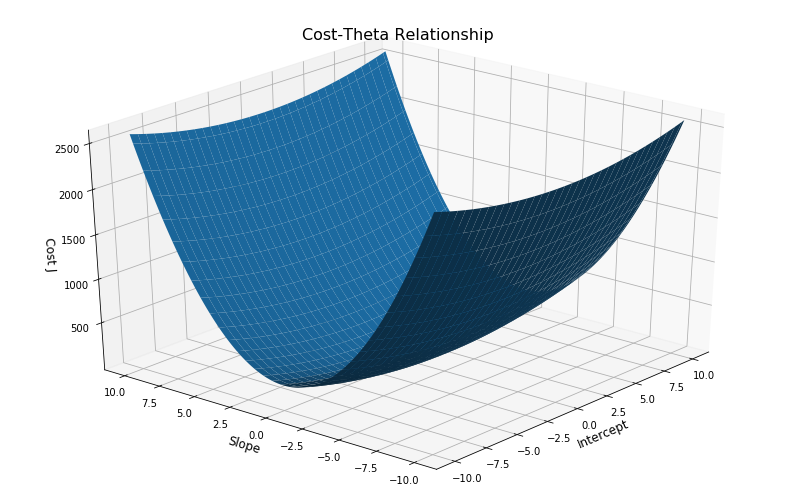

In [10]:
theta0 = (np.linspace(-10,10,101))
theta1 = (np.linspace(-10,10,101))
z = np.zeros([101,101])
for i,t1 in enumerate(theta0):
    for j,t2 in enumerate(theta1):
        theta = [t1,t2]
        z[i,j] = computeCost(X_scaled,y_scaled,theta)

fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d')
a,b = np.meshgrid(theta0,theta1)
ax.plot_surface(a, b, z)
ax.set_xlabel('Intercept',fontsize=12)
ax.set_ylabel('Slope',fontsize=12)
ax.set_zlabel('Cost J',fontsize = 12,rotation=90)
ax.view_init(30, 220)
ax.set_title('Cost-Theta Relationship',fontsize = 16)
plt.show()


### Gradient Descent

In [11]:
def gradientDescent(X,y,theta,alpha,numIter):
    
    i = 0
    sample_size = np.shape(y)[0]
    newCost = [computeCost(X,y,theta)]
    updatedTheta = np.array([theta])
    
    while i < numIter:
        i += 1
        theta -= (alpha/sample_size)*(X.T@(X@theta - y))
        cost = computeCost(X,y,theta)
        newCost.append(cost)
        updatedTheta = np.append(updatedTheta,[theta],axis = 0)
    
    return updatedTheta,newCost
    

### Tuning Alpha

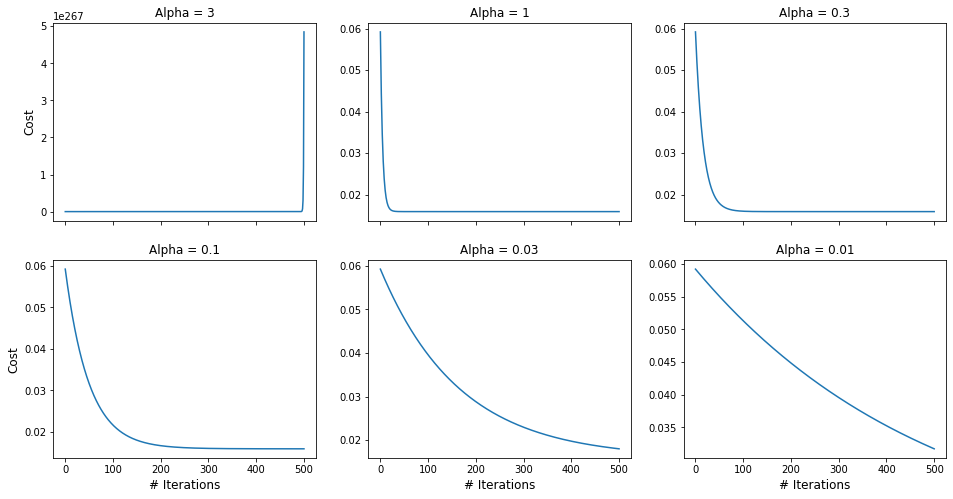

In [12]:
fig = plt.subplots(2,3,figsize = (16,8))

for i,alpha in enumerate([3,1,0.3,0.1,0.03,0.01]):
    theta = np.zeros([np.shape(X_scaled)[1],1])
    GDtheta,GDcost = gradientDescent(X_scaled,y_scaled,theta,alpha,numIter=500)
    plt.subplot(2,3,i+1)
    plt.plot(GDcost)
    plt.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=False)
    if i in [0,3]:
        plt.ylabel('Cost',fontsize = 12)
    if i in range(3,6):
        plt.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=True)
        plt.xlabel('# Iterations',fontsize = 12)
        
    plt.title(f'Alpha = {alpha}')

**Observe**   
1. Non Convergence for Alpha = 3  
2. Very rapid convergence for Alpha = 1  
3. Good convergence for Alpha = 0.3 and Alpha = 0.1  
4. Slow convergence for Alpha = 0.03 and Alpha = 0.01  

### Visualizing Gradient Descent Cost Reduction

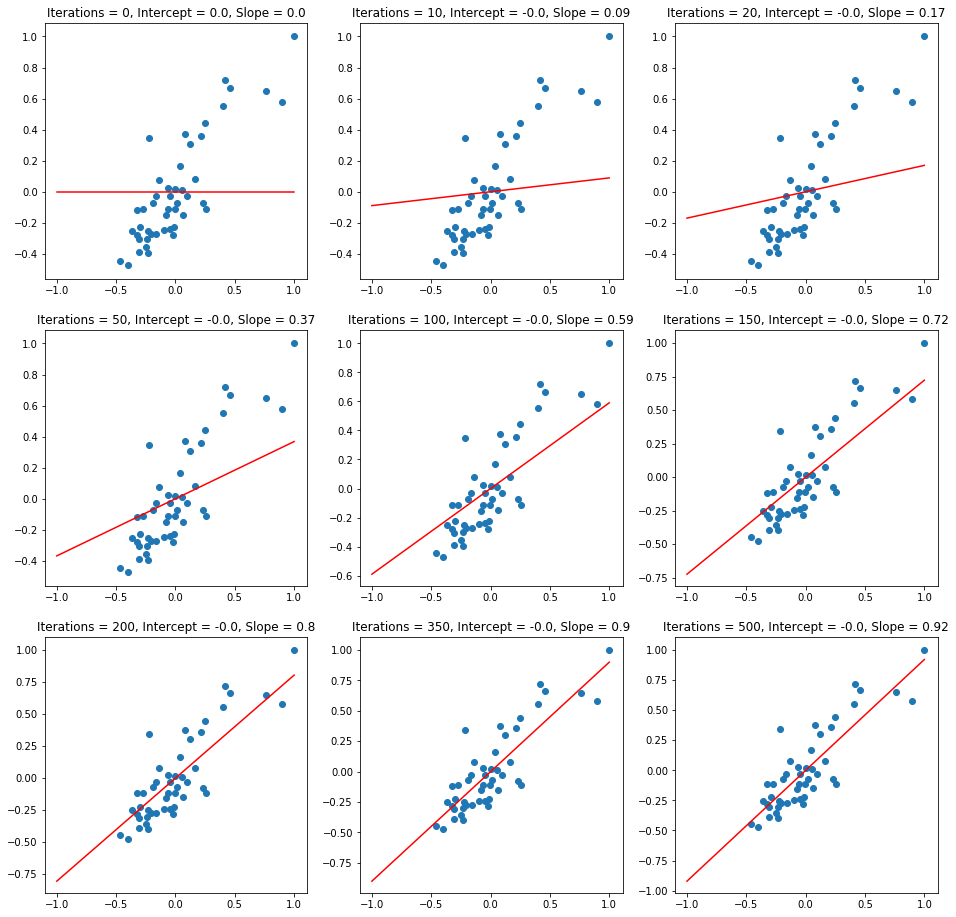

In [13]:
theta = np.zeros([np.shape(X_scaled)[1],1])
GDtheta,GDcost = gradientDescent(X_scaled,y_scaled,theta,0.1,numIter=500)

fig = plt.subplots(3,3,figsize = (16,16))
for i,iteration in enumerate([0,10,20,50,100,150,200,350,500]):
    plt.subplot(3,3,i+1)
    plt.scatter(X_scaled[:,1],y_scaled)
    
    xLine = np.linspace(-1,1,10)
    yLine = GDtheta[iteration][0] + GDtheta[iteration][1]*xLine
    plt.plot(xLine,yLine,'r')
    plt.title(f'Iterations = {iteration}, Intercept = {np.round(GDtheta[iteration][0][0],2)}, Slope = {np.round(GDtheta[iteration][1][0],2)}')
    

### Gradient Descent Output
Computing final output with Alpha = 0.3 and with 10000 iterations

In [14]:
theta = np.zeros([np.shape(X_scaled)[1],1])
GDtheta,GDcost = gradientDescent(X_scaled,y_scaled,theta,0.3,numIter=10000)
print(f'Intercept = {np.round(GDtheta[-1][0][0],8)}')
print(f'Slope = {np.round(GDtheta[-1][1][0],8)}')

Intercept = -0.0
Slope = 0.92704814


# Part B. Linear Projection

Ideally, we would want to solve the linear equation $ X \theta = y $. However, this has m equations in 2 variables (here) and thus may not have a solution. So, we look to solve the closest problem. $ X \theta $ is always in the column space. However, $ y $ may not be in the column space in the no solutions case.

Thus, we take the projection $ p $ of $ y $ in the column space and solve the equation $ X \hat{\theta} = p $

$ X \hat{\theta} = p $

With $ p $ projected in the column space, the error term, $ e = y - p $ shall be orthogonal to the column space

$ e = y - p $ is  in  the  Null space of $ X^T $

$ e = y - X \hat{\theta} $ is  in  the  Null space of $ X^T $

the dot product $ X^T (y - X \hat{\theta}) = 0 $

$ X^T y - X^T X \hat{\theta} = 0 $

$ X^T X \hat{\theta} = X^T y $

$ \hat{\theta} = (X^T X)^{-1} X^T y $

I know, thats the famous Normal equation formula

In [15]:
thetaHat = np.linalg.inv((X_scaled.T@X_scaled))@(X_scaled.T@y_scaled)
print(f'Intercept = {np.round(thetaHat[0][0],8)}')
print(f'Slope = {np.round(thetaHat[1][0],8)}')

Intercept = -0.0
Slope = 0.92704814


## Comparing Gradient Descent Theta and Linear Projection Theta

In [16]:
np.round(thetaHat,8) == np.round(GDtheta[-1],8)

array([[ True],
       [ True]])

The result from both the methods is same